In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [4]:
run_dicts = [np.load(i, allow_pickle=True).item() 
             for i in glob.glob('../tensorboard_runs/*/*.npy')
            if '/01_' in i] ## modify this condition

In [5]:
f1s = {}
recalls = {}
for i in range(len(run_dicts[0])):
    f1s[i] = []
    recalls[i] = []

for dict_ in run_dicts:
    for k,v in dict_.items():
        f1s[k].append(v[0]['f1'])
        recalls[k].append(v[0]['recall'])

In [6]:
recalls_df = pd.DataFrame(recalls).melt()
f1s_df = pd.DataFrame(f1s).melt()

Text(0, 0.5, 'f1s')

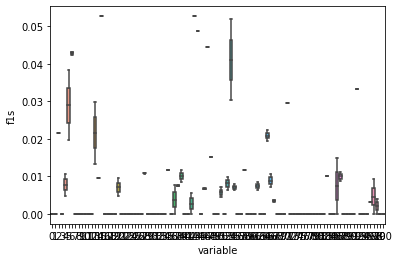

In [7]:
sns.boxplot(data=f1s_df, x='variable', y='value')
plt.ylabel('f1s')

Text(0.5, 0, 'disease')

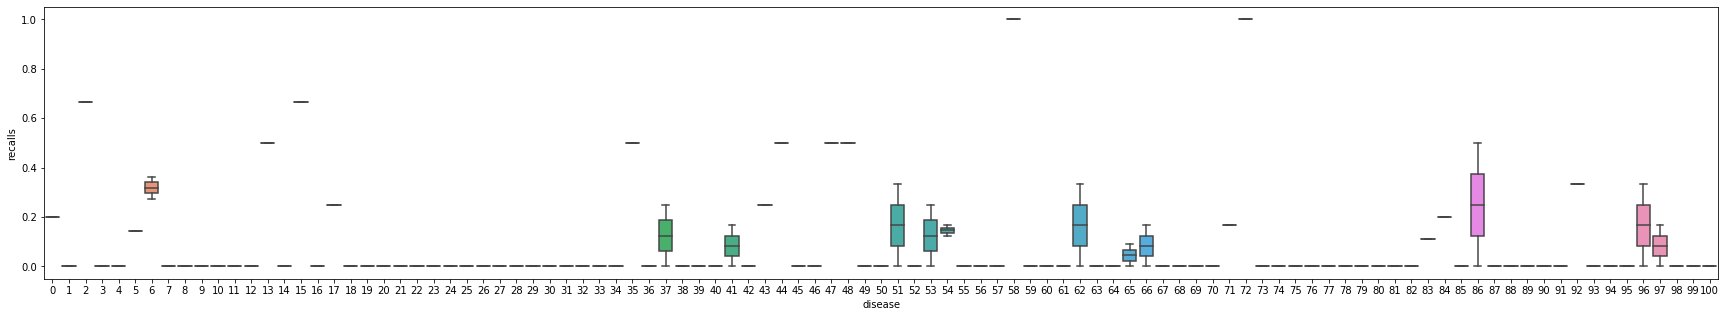

In [15]:
plt.figure(figsize=[30,5])
sns.boxplot(data=recalls_df, x='variable', y='value')
plt.ylabel('recalls')
plt.xlabel('disease')

Text(0.5, 0, 'disease')

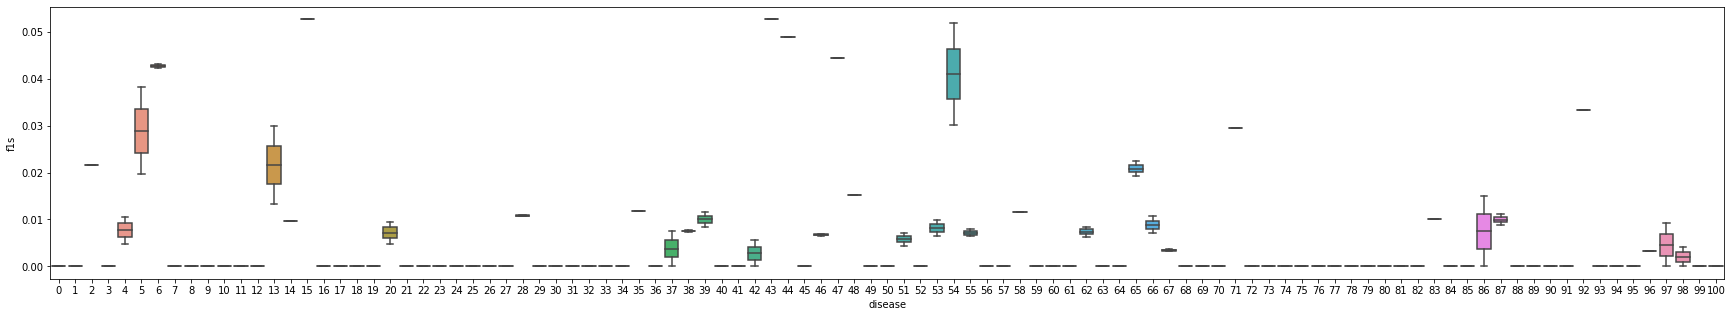

In [16]:
plt.figure(figsize=[30,5])
sns.boxplot(data=f1s_df, x='variable', y='value')
plt.ylabel('f1s')
plt.xlabel('disease')